Price action and moving average based python program that outperforms NIFTY 50 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
import tensorflow
import talib

In [ ]:

# !pip install -q condacolab
# import condacolab
# condacolab.install()


In [ ]:
# !conda create --name my_env python=3.10 numpy=1.22.0 ta-lib
# !conda activate my_env
# !conda install -c conda-forge ta-lib



In [ ]:
# !conda activate my_env


In [66]:
start = '2016-05-13'
end =  '2020-05-31'

Choose your the required stock from NSE below.

In [87]:

sym = "RELIANCE.NS"


Collecting data of the required period from YAHOO Finance using yfinance libraries

In [89]:
fin = yf.download(sym,start,end)
fin_15min = fin.resample('15T').ffill()


fin_15min.tail


[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.tail of                             Open         High          Low        Close  \
Date                                                                      
2016-05-13 00:00:00   489.831879   490.624359   482.922363   484.482574   
2016-05-13 00:15:00   489.831879   490.624359   482.922363   484.482574   
2016-05-13 00:30:00   489.831879   490.624359   482.922363   484.482574   
2016-05-13 00:45:00   489.831879   490.624359   482.922363   484.482574   
2016-05-13 01:00:00   489.831879   490.624359   482.922363   484.482574   
...                          ...          ...          ...          ...   
2020-05-28 23:00:00  1455.000000  1479.750000  1449.000000  1472.250000   
2020-05-28 23:15:00  1455.000000  1479.750000  1449.000000  1472.250000   
2020-05-28 23:30:00  1455.000000  1479.750000  1449.000000  1472.250000   
2020-05-28 23:45:00  1455.000000  1479.750000  1449.000000  1472.250000   
2020-05-29 00:00:00  1468.000000  1472.000000  1452.650024  1464.40002

Plotting Price vs Time(in days) line graph of the required stock

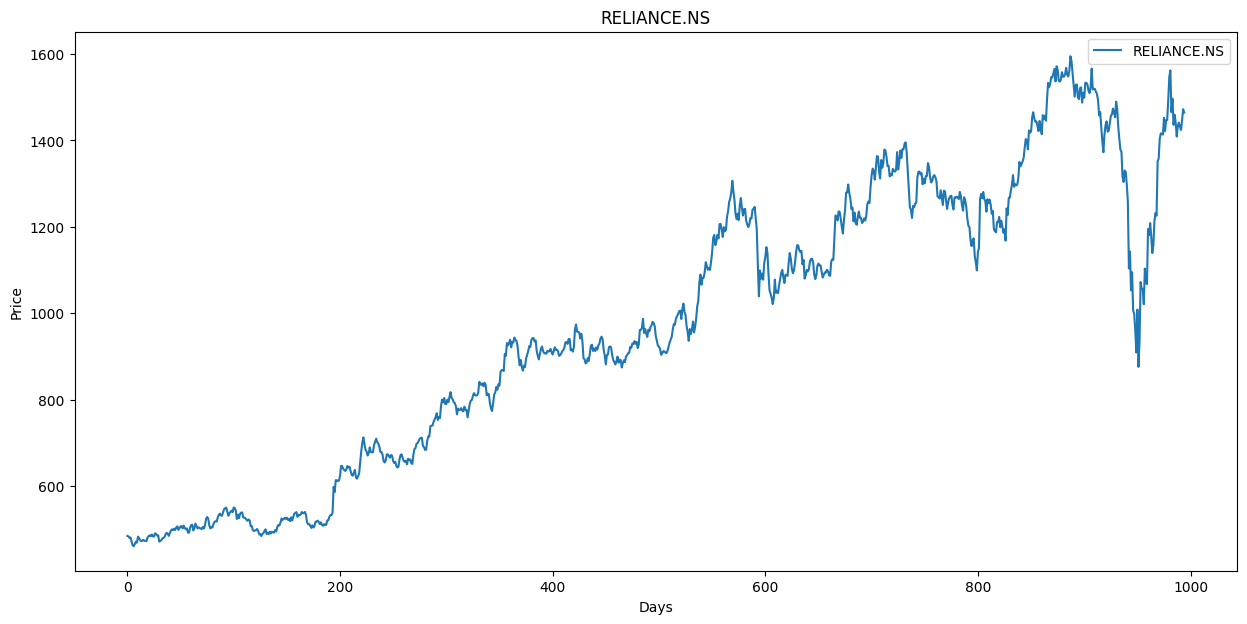

In [69]:
series = fin['Close']
series1 = fin['Open']
series2= fin['High']
series3 = fin['Low']

series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title(sym)

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=sym)

plt.legend()
plt.show()

Imported historical Bollinger band data (all three upper,middle and lower) using TA-Libraries

In [70]:

fin_15min['up_band'], fin_15min['mid_band'], fin_15min['low_band'] = talib.BBANDS(fin_15min['Close'], timeperiod =20)
fin_15min

,Open,High,Low,Close,Adj Close,Volume,up_band,mid_band,low_band
Date,,,,,,,,,
2016-05-13 00:00:00,489.831879,490.624359,482.922363,484.482574,470.661499,6760184,NaN,NaN,NaN
2016-05-13 00:15:00,489.831879,490.624359,482.922363,484.482574,470.661499,6760184,NaN,NaN,NaN
2016-05-13 00:30:00,489.831879,490.624359,482.922363,484.482574,470.661499,6760184,NaN,NaN,NaN
2016-05-13 00:45:00,489.831879,490.624359,482.922363,484.482574,470.661499,6760184,NaN,NaN,NaN
2016-05-13 01:00:00,489.831879,490.624359,482.922363,484.482574,470.661499,6760184,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-28 23:00:00,1455.000000,1479.750000,1449.000000,1472.250000,1457.650757,18518271,1472.250000,1472.250000,1472.250000
2020-05-28 23:15:00,1455.000000,1479.750000,1449.000000,1472.250000,1457.650757,18518271,1472.250000,1472.250000,1472.250000
2020-05-28 23:30:00,1455.000000,1479.750000,1449.000000,1472.250000,1457.650757,18518271,1472.250000,1472.250000,1472.250000


Finally incorporated all the required data into closing_prices data frame using PANDAS dataframes/Libraries


In [71]:
closing_prices=pd.DataFrame()
closing_prices['Close']=fin_15min['Close']
closing_prices['EMA13'] = pd.Series.ewm(closing_prices['Close'], span = 13).mean()
closing_prices['EMA50'] = pd.Series.ewm(closing_prices['Close'], span = 50).mean()
closing_prices['up_band'] = fin_15min['up_band']
closing_prices['mid_band'] = fin_15min['mid_band']
closing_prices['low_band'] = fin_15min['low_band']
closing_prices['Low'] = fin_15min['Low']
closing_prices['High'] = fin_15min['High']
closing_prices['Open'] = fin_15min['Open']

closing_prices



,Close,EMA13,EMA50,up_band,mid_band,low_band,Low,High,Open
Date,,,,,,,,,
2016-05-13 00:00:00,484.482574,484.482574,484.482574,NaN,NaN,NaN,482.922363,490.624359,489.831879
2016-05-13 00:15:00,484.482574,484.482574,484.482574,NaN,NaN,NaN,482.922363,490.624359,489.831879
2016-05-13 00:30:00,484.482574,484.482574,484.482574,NaN,NaN,NaN,482.922363,490.624359,489.831879
2016-05-13 00:45:00,484.482574,484.482574,484.482574,NaN,NaN,NaN,482.922363,490.624359,489.831879
2016-05-13 01:00:00,484.482574,484.482574,484.482574,NaN,NaN,NaN,482.922363,490.624359,489.831879
...,...,...,...,...,...,...,...,...,...
2020-05-28 23:00:00,1472.250000,1472.249984,1471.592171,1472.250000,1472.250000,1472.250000,1449.000000,1479.750000,1455.000000
2020-05-28 23:15:00,1472.250000,1472.249986,1471.617969,1472.250000,1472.250000,1472.250000,1449.000000,1479.750000,1455.000000
2020-05-28 23:30:00,1472.250000,1472.249988,1471.642754,1472.250000,1472.250000,1472.250000,1449.000000,1479.750000,1455.000000


In [72]:
worth=100000
stocks=0

In [73]:
fin = fin.reset_index()

fig = go.Figure(data=[go.Candlestick(x=fin['Date'],
                open=fin['Open'],
                high=fin['High'],
                low=fin['Low'],
                close=fin['Close'])])

fig.show()

In [74]:

worth=100000
reliance_final = closing_prices[closing_prices['EMA50'].notnull()]
reliance_final = reliance_final.reset_index()
def compare_elements(row):
    return row['EMA13'] > row['EMA50']


reliance_final['comparison_result'] = reliance_final.apply(compare_elements, axis=1)


reliance_final = reliance_final.filter(['Close', 'EMA13', 'EMA50', 'comparison_result','Cash', 'Shares'])

reliance_final ['Cash']=0
reliance_final ['Shares']=0

reliance_final.iloc[0, 4] = 100000


tookTrade = False

j=0
k=0
index=0

for index in range(len(reliance_final)):
  worth=reliance_final.iloc[index,4]
  stocks=reliance_final.iloc[index,5]
  comp=reliance_final.iloc[index,3]
  ema50=reliance_final.iloc[index,2]
  cash = worth
  shares=stocks
  close=reliance_final.iloc[index,0]

  
  if(comp==True and tookTrade==False):
    tookTrade =True
    shares = (cash/close)
    #  print(fin_15min['Close'])
    cash = 0
    j=j+1

  if(comp==False and tookTrade == True):
    tookTrade = False
    cash = shares*(close)
    shares=0
    k=k+1

  reliance_final.iloc[index, 4] = cash
  reliance_final.iloc[index, 5] =shares


  try:
    reliance_final.iloc[index + 1, 4] = reliance_final.iloc[index, 4]
    reliance_final.iloc[index + 1, 5] = reliance_final.iloc[index, 5]
  except:
    pass

reliance_final.iloc[index,4]= shares*close


print(reliance_final.head(100))





         Close       EMA13       EMA50  comparison_result      Cash  Shares
0   484.482574  484.482574  484.482574              False  100000.0     0.0
1   484.482574  484.482574  484.482574              False  100000.0     0.0
2   484.482574  484.482574  484.482574              False  100000.0     0.0
3   484.482574  484.482574  484.482574              False  100000.0     0.0
4   484.482574  484.482574  484.482574              False  100000.0     0.0
..         ...         ...         ...                ...       ...     ...
95  484.482574  484.482574  484.482574              False  100000.0     0.0
96  484.482574  484.482574  484.482574              False  100000.0     0.0
97  484.482574  484.482574  484.482574              False  100000.0     0.0
98  484.482574  484.482574  484.482574              False  100000.0     0.0
99  484.482574  484.482574  484.482574              False  100000.0     0.0

[100 rows x 6 columns]


In [79]:

print(stocks)
print(reliance_final.tail())

118.88780147879825
              Close        EMA13        EMA50  comparison_result  Cash  \
141788  1472.250000  1472.249984  1471.592171               True   0.0   
141789  1472.250000  1472.249986  1471.617969               True   0.0   
141790  1472.250000  1472.249988  1471.642754               True   0.0   
141791  1472.250000  1472.249990  1471.666568               True   0.0   
141792  1464.400024  1471.128566  1471.381605              False   0.0   

            Shares  
141788  118.887801  
141789  118.887801  
141790  118.887801  
141791  118.887801  
141792    0.000000  


In [84]:
k=stocks*reliance_final["Close"][141791]



175032.56572716072

In [94]:
percentage_profit=(k-100000)/1000
percentage_profit

75.03256572716072

on May-2016 NIFTY50 was at 8,287.75	and on May-2020 it went up to 9,580.30. 

In [95]:
percentage_profit_NIFTY = (9580.30 - 8287.75)/(82.8775)
percentage_profit_NIFTY

15.59590962565231

In [97]:
Generated_Alpha = round(percentage_profit/percentage_profit_NIFTY)
Generated_Alpha

5

Results:


In this timeperiod mentioned above, NIFTY only gave a return of about 15.6% but with our price action and moving average based strategy we were able to get around 75% returns on Large Cap Stocks like RELIANCE. 
One can try this strategy on multiple stocks and we are sure you will get the same results whatsoever.

